In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import test_partial
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import torch

2022-02-23 00:34:23.470538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 00:34:23.470587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data1 = np.loadtxt("../data/Unioncom/MMD/s1_mapped1.txt")
data2 = np.loadtxt("../data/Unioncom/MMD/s1_mapped2.txt")
type1 = np.loadtxt("../data/Unioncom/MMD/s1_type1.txt")
type2 = np.loadtxt("../data/Unioncom/MMD/s1_type2.txt")
color_func = lambda x: x

np.random.seed(42)
idx = np.array(range(len(data1)))
np.random.shuffle(idx)
data1, data2 = (d[idx] for d in (data1,data2))
type1, type2 = (d[idx] for d in (type1,type2))

num_aligned = int(.6 * len(data2))
data1, data2, data1_withheld, data2_withheld = data1[:num_aligned], data2[:num_aligned], data1[num_aligned:], data2[num_aligned:]
type1_withheld, type2_withheld = type1[num_aligned:], type2[num_aligned:]

# Predict Missing Modality

In [4]:
# Align data
cm = ComManDo()
cm_data = cm.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (180, 2000)
Dataset 1: (180, 1000)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:2.8117 alpha:0.5597
epoch:[200/2000] err:2.6190 alpha:0.5925
epoch:[300/2000] err:2.0347 alpha:0.6476
epoch:[400/2000] err:1.4363 alpha:0.6967
epoch:[500/2000] err:1.1299 alpha:0.7251
epoch:[600/2000] err:1.0013 alpha:0.7402
epoch:[700/2000] err:0.9430 alpha:0.7485
epoch:[800/2000] err:0.9106 alpha:0.7538
epoch:[900/2000] err:0.8889 alpha:0.7576
epoch:[1000/2000] err:0.8725 alpha:0.7606
epoch:[1100/2000] err:0.8593 alpha:0.7632
epoch:[1200/2000] err:0.8484 alpha:0.7654
epoch:[1300/2000] err:0.8390 alpha:0.7673
epoch:[1400/2000] err:0.8308 alpha:0.7689
epoch:[1500/2000] err:0.8234 alpha:0.7704
epoch:[1600/2000] err:0.8167 alpha:0.7717
epoch:[1700/2000] err:0.8107 alpha:0.7728
epoch:[1800/2000] err:0.8053 alpha:0.7739
epoch:[1900/2000] err:0.8004 alpha:0.7748
epoch:[2000/2000] err:0.7959

# Results

In [5]:
# Compile prediction and true
minmax = lambda d:d#lambda d: (d - np.min(d)) / (np.max(d) - np.min(d))
predicted = minmax(cm.model.decoders[1](
    cm.model.encoders[0](
        torch.tensor(data1_withheld).float()
    )).detach().cpu().numpy())
actual = minmax(data2_withheld)

In [6]:
# Produce confusion matrix
# tn fp
# fn tp
confusion_matrix(actual.flatten() > .5,  predicted.flatten() > .5, labels=(False, True), normalize='true')

array([[9.92347813e-01, 7.65218715e-03],
       [9.99665149e-01, 3.34851326e-04]])

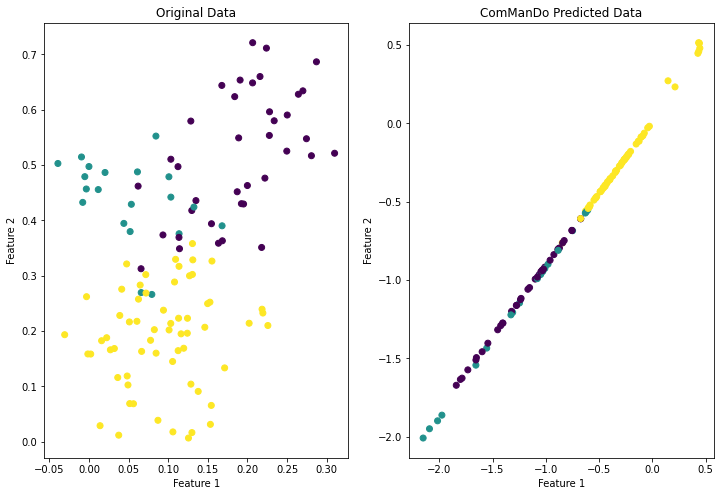

In [7]:
# Plot
f1,f2=0,1
colors = [color_func(i) for i in type2_withheld]
plt.subplots(1,2, figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(actual[:, f1], actual[:, f2], c=colors)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.subplot(1,2,2)
plt.scatter(predicted[:, f1], predicted[:, f2], c=colors)
plt.title('ComManDo Predicted Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');